<a href="https://colab.research.google.com/github/v5v5/data-science-plan/blob/main/Day2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# День 2
Предсказание курса доллара

* Хитро готовим данные
* Пробуем разные модели
* Оценим качество моделей
* Выдадим вам ДЗ на конкурс

Данные от центробанка: http://cbr.ru/currency_base/dynamics/

Данные по нефти: https://www.eia.gov/dnav/pet/hist/rbrteD.htm

In [ ]:
import pandas as pd

In [ ]:
usd_rate = pd.read_excel("/content/usd_rate.xlsx")

In [ ]:
brent = pd.read_excel("/content/brent.xls", sheet_name=1, skiprows=2, names=["date", "price"])

In [ ]:
usd_rate.describe()

,nominal,curs
count,984.0,984.000000
mean,1.0,65.048381
std,0.0,6.183982
min,1.0,55.671700
25%,1.0,59.629550
50%,1.0,64.250850
75%,1.0,68.421175
max,1.0,80.881500


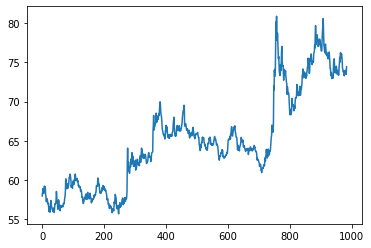

In [ ]:
usd_rate["curs"].plot()

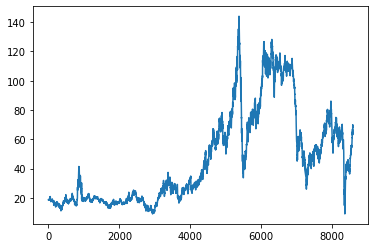

In [ ]:
brent["price"].plot()

In [ ]:
usd_rate.head(3)

,nominal,data,curs,cdx
0,1,2017-03-01,57.9627,Доллар США
1,1,2017-03-02,58.3776,Доллар США
2,1,2017-03-03,58.4067,Доллар США


In [ ]:
brent.head(3)

,date,price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55


In [ ]:
df = usd_rate.set_index("data").join(brent.set_index("date"))

In [ ]:
df.head(5)

,nominal,curs,cdx,price
data,,,,
2017-03-01,1,57.9627,Доллар США,55.72
2017-03-02,1,58.3776,Доллар США,54.16
2017-03-03,1,58.4067,Доллар США,54.12
2017-03-04,1,58.9099,Доллар США,NaN
2017-03-07,1,58.3370,Доллар США,54.61


In [ ]:
df.drop(["nominal", "cdx"], axis=1, inplace=True) 

In [ ]:
df.fillna(method="ffill", inplace=True)

In [ ]:
df.reset_index(inplace=True)

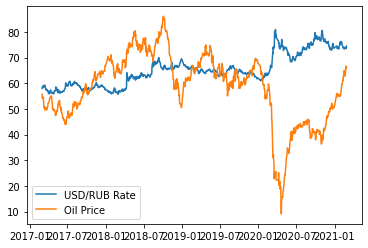

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df["data"], df["curs"], label="USD/RUB Rate")
plt.plot(df["data"], df["price"], label="Oil Price")
plt.legend()

In [ ]:
df["weekday"] = df["data"].dt.weekday
df["month"] = df["data"].dt.month
df["year"] = df["data"].dt.year

In [ ]:
df.head(5)

,data,curs,price,weekday,month,year
0,2017-03-01,57.9627,55.72,2,3,2017
1,2017-03-02,58.3776,54.16,3,3,2017
2,2017-03-03,58.4067,54.12,4,3,2017
3,2017-03-04,58.9099,54.12,5,3,2017
4,2017-03-07,58.3370,54.61,1,3,2017


In [ ]:
df[ df["weekday"] == 2 ].describe() 

,curs,price,weekday,month,year
count,198.000000,198.000000,198.0,198.000000,198.000000
mean,64.960390,58.211515,2.0,6.681818,2018.631313
std,6.219307,13.202679,0.0,3.416112,1.166551
min,55.671700,13.770000,2.0,1.000000,2017.000000
25%,59.500475,50.157500,2.0,4.000000,2018.000000
50%,64.205250,60.640000,2.0,7.000000,2019.000000
75%,68.143250,66.842500,2.0,10.000000,2020.000000
max,80.000600,85.450000,2.0,12.000000,2021.000000


In [ ]:
df

,data,curs,price,weekday,month,year
0,2017-03-01,57.9627,55.72,2,3,2017
1,2017-03-02,58.3776,54.16,3,3,2017
2,2017-03-03,58.4067,54.12,4,3,2017
3,2017-03-04,58.9099,54.12,5,3,2017
4,2017-03-07,58.3370,54.61,1,3,2017
...,...,...,...,...,...,...
979,2021-02-20,73.9717,62.84,5,2,2021
980,2021-02-21,73.9833,62.84,6,2,2021
981,2021-02-25,73.7532,66.69,3,2,2021
982,2021-02-26,73.4747,65.86,4,2,2021


In [ ]:
past_days = 7

for day in range(past_days):
  d = day+1
  df[f"curs_back_{d}d"] = df["curs"].shift(d)
  df[f"oil_back_{d}d"] = df["price"].shift(d)

In [ ]:
df

,data,curs,price,weekday,month,year,curs_back_1d,oil_back_1d,curs_back_2d,oil_back_2d,curs_back_3d,oil_back_3d,curs_back_4d,oil_back_4d,curs_back_5d,oil_back_5d,curs_back_6d,oil_back_6d,curs_back_7d,oil_back_7d
0,2017-03-01,57.9627,55.72,2,3,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-03-02,58.3776,54.16,3,3,2017,57.9627,55.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-03-03,58.4067,54.12,4,3,2017,58.3776,54.16,57.9627,55.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-03-04,58.9099,54.12,5,3,2017,58.4067,54.12,58.3776,54.16,57.9627,55.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-03-07,58.3370,54.61,1,3,2017,58.9099,54.12,58.4067,54.12,58.3776,54.16,57.9627,55.72,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,2021-02-20,73.9717,62.84,5,2,2021,73.7755,62.84,73.7669,64.09,73.2895,65.02,73.3092,63.96,73.9378,62.47,73.7579,62.47,73.8526,61.09
980,2021-02-21,73.9833,62.84,6,2,2021,73.9717,62.84,73.7755,62.84,73.7669,64.09,73.2895,65.02,73.3092,63.96,73.9378,62.47,73.7579,62.47
981,2021-02-25,73.7532,66.69,3,2,2021,73.9833,62.84,73.9717,62.84,73.7755,62.84,73.7669,64.09,73.2895,65.02,73.3092,63.96,73.9378,62.47
982,2021-02-26,73.4747,65.86,4,2,2021,73.7532,66.69,73.9833,62.84,73.9717,62.84,73.7755,62.84,73.7669,64.09,73.2895,65.02,73.3092,63.96


In [ ]:
df["usd_8d"] = df["curs"].shift(1).rolling(window=8).median()
df["oil_42d"] = df["price"].shift(1).rolling(window=42).mean()

In [ ]:
df.dropna(inplace=True)

In [ ]:
df

,data,curs,price,weekday,month,year,curs_back_1d,oil_back_1d,curs_back_2d,oil_back_2d,curs_back_3d,oil_back_3d,curs_back_4d,oil_back_4d,curs_back_5d,oil_back_5d,curs_back_6d,oil_back_6d,curs_back_7d,oil_back_7d,usd_8d,oil_42d
42,2017-04-29,56.9838,49.46,5,4,2017,56.9707,49.46,56.3131,49.46,55.8453,49.99,56.0794,49.37,56.2307,49.93,56.4165,49.93,56.1753,50.66,56.20300,52.019762
43,2017-05-03,56.9518,48.82,2,5,2017,56.9838,49.46,56.9707,49.46,56.3131,49.46,55.8453,49.99,56.0794,49.37,56.2307,49.93,56.4165,49.93,56.27190,51.870714
44,2017-05-04,57.0927,47.53,3,5,2017,56.9518,48.82,56.9838,49.46,56.9707,49.46,56.3131,49.46,55.8453,49.99,56.0794,49.37,56.2307,49.93,56.36480,51.743571
45,2017-05-05,57.5714,47.45,4,5,2017,57.0927,47.53,56.9518,48.82,56.9838,49.46,56.9707,49.46,56.3131,49.46,55.8453,49.99,56.0794,49.37,56.63245,51.586667
46,2017-05-06,58.5382,47.45,5,5,2017,57.5714,47.45,57.0927,47.53,56.9518,48.82,56.9838,49.46,56.9707,49.46,56.3131,49.46,55.8453,49.99,56.96125,51.427857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,2021-02-20,73.9717,62.84,5,2,2021,73.7755,62.84,73.7669,64.09,73.2895,65.02,73.3092,63.96,73.9378,62.47,73.7579,62.47,73.8526,61.09,73.77120,55.983333
980,2021-02-21,73.9833,62.84,6,2,2021,73.9717,62.84,73.7755,62.84,73.7669,64.09,73.2895,65.02,73.3092,63.96,73.9378,62.47,73.7579,62.47,73.77120,56.269286
981,2021-02-25,73.7532,66.69,3,2,2021,73.9833,62.84,73.9717,62.84,73.7755,62.84,73.7669,64.09,73.2895,65.02,73.3092,63.96,73.9378,62.47,73.77120,56.546429
982,2021-02-26,73.4747,65.86,4,2,2021,73.7532,66.69,73.9833,62.84,73.9717,62.84,73.7755,62.84,73.7669,64.09,73.2895,65.02,73.3092,63.96,73.77120,56.892143


In [ ]:
df = pd.get_dummies(df, columns=["year", "month", "weekday"])
df.drop(["data", "price"], axis=1, inplace=True)

In [ ]:
df

,curs,curs_back_1d,oil_back_1d,curs_back_2d,oil_back_2d,curs_back_3d,oil_back_3d,curs_back_4d,oil_back_4d,curs_back_5d,oil_back_5d,curs_back_6d,oil_back_6d,curs_back_7d,oil_back_7d,usd_8d,oil_42d,year_2017,year_2018,year_2019,year_2020,year_2021,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
42,56.9838,56.9707,49.46,56.3131,49.46,55.8453,49.99,56.0794,49.37,56.2307,49.93,56.4165,49.93,56.1753,50.66,56.20300,52.019762,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
43,56.9518,56.9838,49.46,56.9707,49.46,56.3131,49.46,55.8453,49.99,56.0794,49.37,56.2307,49.93,56.4165,49.93,56.27190,51.870714,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
44,57.0927,56.9518,48.82,56.9838,49.46,56.9707,49.46,56.3131,49.46,55.8453,49.99,56.0794,49.37,56.2307,49.93,56.36480,51.743571,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
45,57.5714,57.0927,47.53,56.9518,48.82,56.9838,49.46,56.9707,49.46,56.3131,49.46,55.8453,49.99,56.0794,49.37,56.63245,51.586667,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
46,58.5382,57.5714,47.45,57.0927,47.53,56.9518,48.82,56.9838,49.46,56.9707,49.46,56.3131,49.46,55.8453,49.99,56.96125,51.427857,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,73.9717,73.7755,62.84,73.7669,64.09,73.2895,65.02,73.3092,63.96,73.9378,62.47,73.7579,62.47,73.8526,61.09,73.77120,55.983333,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
980,73.9833,73.9717,62.84,73.7755,62.84,73.7669,64.09,73.2895,65.02,73.3092,63.96,73.9378,62.47,73.7579,62.47,73.77120,56.269286,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
981,73.7532,73.9833,62.84,73.9717,62.84,73.7755,62.84,73.7669,64.09,73.2895,65.02,73.3092,63.96,73.9378,62.47,73.77120,56.546429,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
982,73.4747,73.7532,66.69,73.9833,62.84,73.9717,62.84,73.7755,62.84,73.7669,64.09,73.2895,65.02,73.3092,63.96,73.77120,56.892143,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
X = df.drop("curs", axis=1) # Входные данные
y = df["curs"] # Выход

Тестовая выборка - экзамен

Тренировочная выборка - учебник



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

X_train - задачи в учебнике


y_train - ответы на задачи в учебника

X_test - задачи на экзамене

y_test - ответы на экзамен



In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(631, 39)
(631,)
(311, 39)
(311,)


In [ ]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
prediction = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error

In [ ]:
print("MAE", mean_absolute_error(y_test, prediction))
print("MAX", max_error(y_test, prediction))

MAE 0.41105266348481406
MAX 3.4463945473451503


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=200, random_state=42, criterion="mae")
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print("MAE", mean_absolute_error(y_test, prediction))
print("MAX", max_error(y_test, prediction))

MAE 0.4113472966237989
MAX 2.583302999999944


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=2)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print("MAE", mean_absolute_error(y_test, prediction))
print("MAX", max_error(y_test, prediction))

MAE 0.4198826366559487
MAX 2.4607500000000044


In [ ]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(100,100,100))
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print("MAE", mean_absolute_error(y_test, prediction))
print("MAX", max_error(y_test, prediction))

MAE 0.7027541936350192
MAX 3.3498292723852643


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# ДЕНЬ 3
(специально для Андрея)

In [ ]:
from sklearn.model_selection import GridSearchCV

GridSearch - поиск по сетке параметров

n_estimators = 100, 200, 500, 1000

max_depth = 3,5,10,15

criterion = mse, mae


CV - cross validation, кросс-валидация

```
X - тренировочные примеры
* - тестовые примеры

[XXXXXXXXXXXXXXXXXXXXXXXXXX*********]

Перемешивать
[XXXXXXXXXXXXXXXXXXXXXXXXXX*********]

КВ
[XXXXXXXXXXXXXXXXXXXXXXXXXX*********]
[XXXXXXXXXXXXXXXXX*********XXXXXXXXX]
[XXXXXXXX*********XXXXXXXXXXXXXXXXXX]
[*********XXXXXXXXXXXXXXXXXXXXXXXXXX]
```


In [ ]:
model = RandomForestRegressor(random_state=42)
param_grid = {
    "n_estimators": [50,100,500],
    "criterion": ["mse", "mae"],
    "min_samples_split": [2,3],
}
GS = GridSearchCV(model, param_grid, scoring = "neg_mean_absolute_error", cv=3, n_jobs=-1)
GS.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [ ]:
GS.best_score_

-0.38124203310765353

In [ ]:
GS.best_params_

{'criterion': 'mae', 'min_samples_split': 2, 'n_estimators': 100}

In [ ]:
df.to_excel("df.xls")